Exercise 1 : Understanding The Problem And Data Collection

We want to predict if an individual will have diabetes.

Load the diabetes dataset and explore it.
How many positive and negative cases is there ?
Split the data into training and testing sets

In [ ]:
import pandas as pd

#Load the diabetes dataset and explore it.
df = pd.read_csv('diabetes_prediction_dataset.csv')
print(df.head())
print(df.describe())
print(df.info())

#How many positive and negative cases is there ?
print(df['diabetes'].value_counts())
#Negatives    91500
#Positives     8500

#Split the data into training and testing sets
from sklearn.model_selection import train_test_split

# Features (X) and target (y)
X = df.drop(columns=['diabetes']) #Removes 'diabetes' feature from dataset since it's the label
y = df['diabetes'] #Sets 'diabetes' feature as label

# Split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check sizes
print(f"Train set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")




   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0

Exercise 2 : Model Picking And Standardization

Which classification model can we use in this problem and why ?

Do we need to standardize the data ? If yes, use .StandardScaler()

In [10]:
#We need to use models for caterical data such as Logistic Regression, Decision Tree or Random Forest.
#For logistic regression, standardizing data is necessary, not for the other two.

numerical_data = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_data] = scaler.fit_transform(df[numerical_data])
print(df.head())

   gender       age  hypertension  heart_disease smoking_history       bmi  \
0  Female  1.692704             0              1           never -0.321056   
1  Female  0.538006             0              0         No Info -0.000116   
2    Male -0.616691             0              0           never -0.000116   
3  Female -0.261399             0              0         current -0.583232   
4    Male  1.515058             1              1         current -1.081970   

   HbA1c_level  blood_glucose_level  diabetes  
0     1.001706             0.047704         0  
1     1.001706            -1.426210         0  
2     0.161108             0.489878         0  
3    -0.492690             0.416183         0  
4    -0.679490             0.416183         0  


Exercise 3 : Model Training

We will use, the logistic regression model, Train it.

In [ ]:
#Encoding of catgorical data as object:
df_encoded = pd.get_dummies(df, columns=['gender', 'smoking_history'], drop_first=True)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assuming numerical features are already scaled and categorical features encoded
X = df_encoded.drop('diabetes', axis=1)
y = df_encoded['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)





Training accuracy: 0.9607125
Test accuracy: 0.95895


Exercise 4 : Evaluation Metrics

Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.

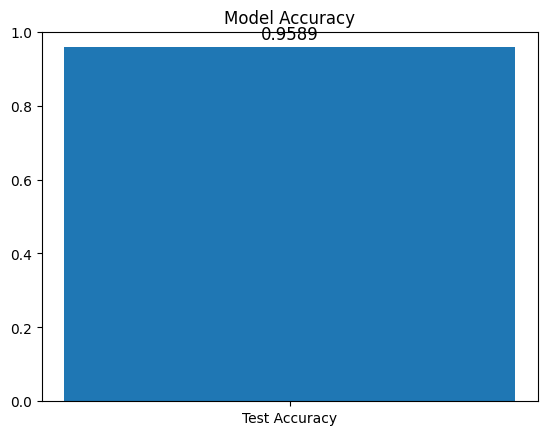

In [ ]:
#Plot the accuracy score and comment the results.

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Predict on test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

plt.bar(['Test Accuracy'], [accuracy])
plt.ylim(0, 1)
plt.title('Model Accuracy')

# Add text annotation on top of the bar
plt.text(0, accuracy + 0.02, f'{accuracy:.4f}', ha='center', fontsize=12)

plt.show()

#Proportion of true values is close to 1. Valid



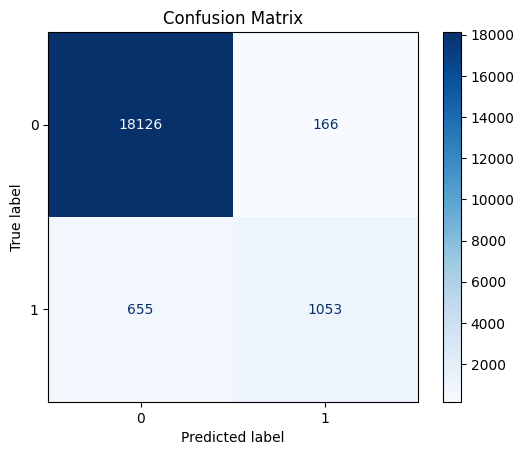

In [ ]:
#Plot the confusion matrix and comment the results.
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

#True Positives (TP = 18128): The model correctly identified 18,128 diabetes cases. Great!
#False Negatives (FN = 166): Only 166 actual diabetes cases were missed. This is low, which is good since missing diabetes cases can be risky.
#False Positives (FP = 655): 655 people were incorrectly classified as having diabetes. This might lead to unnecessary follow-ups, but is usually less harmful than false negatives in medical settings.
#True Negatives (TN = 1053): The model correctly identified 1,053 non-diabetes cases.




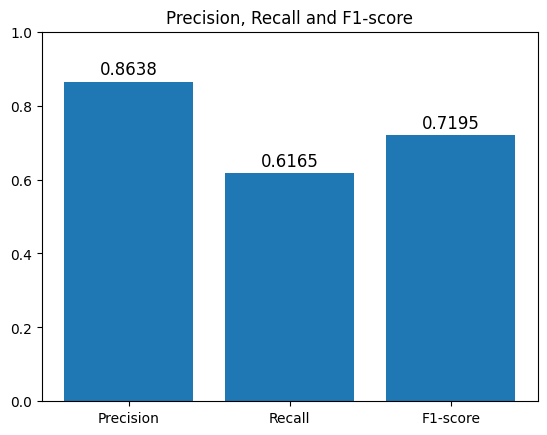

In [19]:
#Plot the Recall, precision, F1-score and comment the results.
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = {'Precision': precision, 'Recall': recall, 'F1-score': f1}

plt.bar(metrics.keys(), metrics.values())
plt.ylim(0, 1)
plt.title('Precision, Recall and F1-score')
# Add text annotation on top of the bar
plt.text(0, precision + 0.02, f'{precision:.4f}', ha='center', fontsize=12)
plt.text(1, recall + 0.02, f'{recall:.4f}', ha='center', fontsize=12)
plt.text(2, f1 + 0.02, f'{f1:.4f}', ha='center', fontsize=12)
plt.show()

#Precision ≈ 0.86. When the model predicts diabetes, it’s correct about 86% of the time. This means relatively few false positives.
#Recall ≈ 0.62. The model detects about 62% of all actual diabetes cases. This is moderate — it misses around 38% (false negatives) of true diabetes cases, which might be a concern depending on the application (e.g., medical diagnosis often values higher recall).
#F1-score ≈ 0.72. The F1-score balances precision and recall. Your model leans more towards precision over recall.
#Your model is good at avoiding false alarms (high precision) but less good at catching every positive case (lower recall).

Exercise 5 : Visualizing The Performance Of Our Model

Visualize the decision boundary with accuracy information.

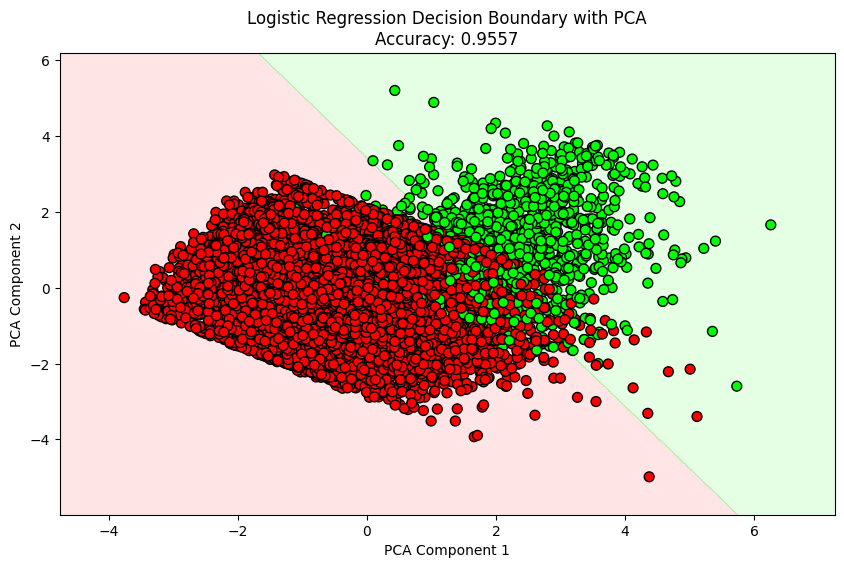

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Step 1: Apply PCA to reduce features to 2D
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Step 2: Train logistic regression on PCA components
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, y_train)

# Step 3: Create mesh grid for decision boundary visualization
x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 4: Predict class for each point on mesh grid
Z = model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 5: Plot decision boundary and points
plt.figure(figsize=(10, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Logistic Regression Decision Boundary with PCA\nAccuracy: {accuracy_score(y_test, model_pca.predict(X_test_pca)):.4f}')
plt.show()


In [ ]:
Exercise 6 : ROC Curve

Plot the ROC Curve using this code template available on this link

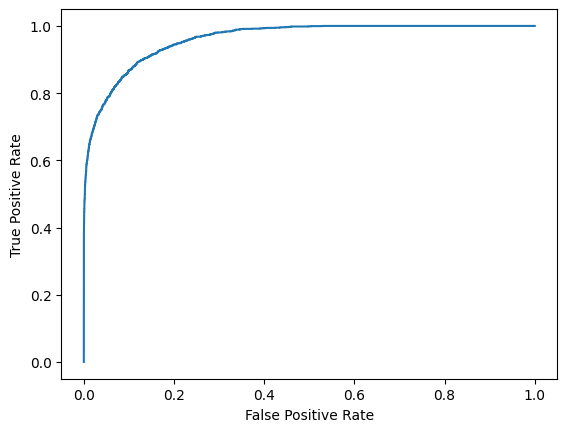

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt



#define metrics
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()